In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import library.pricing as price

## Required Yield

The interest rate an investor desires from investing in a bond. Specified as an annual interest rate. When bonds are based off of a semiannual (or less) period, the effective annual yield would be greater than the annual interest rate (compounding).

**Note:** Comparable bonds are selected based on required yield, only in the context of option free bonds for the following analyses.

### Yield Measuring
Given the prices for a bond, there are many ways to calculate the required yield. Indeed, not one measurement is absolute, yet offer an idea of what to expect in return on a bond from one or more of the following sources:
 - Coupon interest made by the issuer
 - Capital gains or losses when the bond matures
 - Income from reinvestment of coupon interest payments (interest-on-interest)
 
The three yield measures most commonly cited for the potential return of a bond are:
1. Current Yield
2. Yield-to-Maturity
3. Yield-to-Call

### Current Yield

This relates the annual coupon interest to the market price.

**Note:** Current yield only considers the coupon interest and no other source of return.

#### Yield Calculation Formula
The current yield formula is given by:
$$current\ yield=\frac{annual\ dollar\ coupon\ interest}{price}$$

##### Examples with Formula

&emsp; Bond Length - $18$ years <br>
&emsp; Coupon Rate - $6\%$ <br>
&emsp; Bond Value - $\$700.89$ <br>
&emsp; Maturity Value - $\$1,000$

In [2]:
bond_len = 18
coupon_per = .06 # yearly rate
bond_price = 700.89
par_val = 1000

coupon_per = par_val * coupon_per
req_yield_per = coupon_per / bond_price

print('Annual Coupon Rate - ${:.2f}'.format(coupon_per))
print('Required Yield - {:.2%}'.format(req_yield_per))

Annual Coupon Rate - $60.00
Required Yield - 8.56%


In [3]:
def bond_current_yield_calc(bond_len, coupon_per, bond_price, par_val, len_time='annual', details=True):
    """ Calculate Current Yield for a Bond
    
    Given args are converted into numpy arrrays. 
    They are then used to calculate what the current yield for a bond based on annualized coupon payments.
    
    Args:
        bond_len (int): Number of bond periods before maturity.
        coupon_per (float): Current interest rate return on a bond per specified period.
        par_val (float): Value of bond at par.
        bond_price (float): Price of bond given.
        len_time (str): Period length designation.
        details (bool): Determines whether to print calculation results.
        
    Returns:
        np.float: Required yield based on current yield percentage.
        
    """
    # convert to numpy arrays
    bond_len = np.array(bond_len)
    coupon_per = np.array(coupon_per)
    bond_price = np.array(bond_price)
    par_val = np.array(par_val)
    
    # fail safe
    if (bond_len.size != coupon_per.size) | (coupon_per.size != par_val.size):
        return 'Incorrect argument dimensions'
    if len_time.lower() not in ('semiannual', 'annual'):
        return 'Incorrect period length description'
    
    # adjust fields based on length of bond period
    period = np.where(len_time.lower()=='semiannual', 2, 1)
    coupon_per = np.multiply(coupon_per, period)
    
    # adjust for given coupon rate format
    coupon_per = np.where(coupon_per > 1, np.divide(coupon_per, 100), coupon_per)
    
    # calculate current yield
    coupon_per = np.multiply(par_val, coupon_per)
    req_yield_per = np.divide(coupon_per, bond_price)
    
    if details:
        if bond_len.size == 1:
            'Annual Coupon Rate - ${:.2f}'.format(coupon_per)
            print(len_time.capitalize() + ' Coupon Rate - ${:.2f}'.format(coupon_per))
            print('Required Yield - {:.2%}'.format(req_yield_per))
        else:
            np.set_printoptions(precision=2)
            print(len_time.capitalize() + ' Coupon Rate - ${}'.format(coupon_per))
            print('Required Yield - {}'.format(req_yield_per))
        
    return req_yield_per

&emsp; Bond Length - $18$ years <br>
&emsp; Coupon Rate - $6\%$ <br>
&emsp; Bond Value - $\$700.89$ <br>
&emsp; Maturity Value - $\$1,000$

In [4]:
bond_current_yield_calc(bond_len=18, coupon_per=.06, bond_price=700.89, par_val=1000, len_time='annual')

Annual Coupon Rate - $60.00
Required Yield - 8.56%


0.0856054445062706

### Yield-to-Maturity

Simply, the internal rate of return on an investment, is the interest rate that makes the present value of the cash-flows equal to the price of a bond (initial investment). In effect, we are running the pricing formula for a bond at different required yields to match up with the present value of the coupon payments and maturity value.

**Note:** Involves a trial and errror approach to calculate based on given price.

#### Price Calculation Formula
The price formula is given by:
$$p=c\left[\frac{1-\left\{\frac{1}{(1+i)^n}\right\}}{i}\right]+\frac{M}{(1+i)^n}$$
where <br> 
&emsp; $p=$ price $(\$)$ <br> 
&emsp; $c=$ semiannual coupon payment $(\$)$ <br> 
&emsp; $n=$ number of periods (number of years x 2) <br> 
&emsp; $i=$ periodic interest rate (required yield / 2) <br> 
&emsp;$M=$ maturity/par value

##### Formula with Examples

In [5]:
def bond_yield_maturity_calc(bond_len, coupon_per, bond_price, par_val, call_val=0, len_time='annual', details=True):    
    """ Calculate Yield-to-Maturity for a Bond
    
    Given args are converted into numpy arrrays. 
    They are then used to calculate what the payout is for a bond during its life into maturity.
    
    Args:
        bond_len (int): Number of bond periods before maturity.
        coupon_per (float): Current interest rate return on a bond per specified period.
        bond_price (float): Price of bond given.        
        par_val (float): Value of bond at par.
        call_val (float): Value of bond at first callable event.
        len_time (str): Period length designation.
        details (bool): Determines whether to print calculation results.
        
    Returns:
        np.float: Required interest optimized for given bond value.
        
    """    
    # calculate pricing
    req_yield_pers = np.arange(.01, 100, .01)
    bond_prices = price.bond_price_calc(bond_len=bond_len, coupon_per=coupon_per, par_val=par_val, call_val=call_val, req_yield_per=req_yield_pers, len_time=len_time, details=False)[2]
    
    # calculate yield
    try:
        bond_index = np.where(np.round(bond_prices, 2) == np.round(bond_price, 2))[0]
        bond_index.shape[1]
    except:
        ordered_bond_prices = bond_prices.copy()
        ordered_bond_prices.sort() 
        bond_index = np.searchsorted(np.round(ordered_bond_prices, 2), np.array(np.round(bond_price, 2)))
        bond_index = np.where(bond_prices == ordered_bond_prices[bond_index])
     
    if details:
            print('Yield-to-Maturity Lookup - {:.2%}'.format(np.divide(req_yield_pers[bond_index][0], 100)))

    return req_yield_pers[bond_index][0]

&emsp; Bond Length - $18$ years <br>
&emsp; Coupon Rate - $6\%$ <br>
&emsp; Bond Value - $\$700.89$ <br>
&emsp; Maturity Value - $\$1,000$

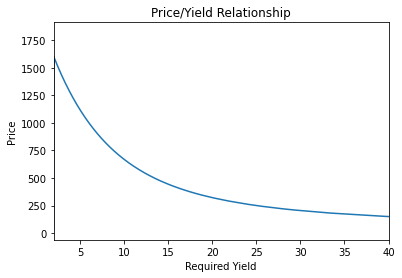

,Price
Required Yield,
7.0,898.54
7.5,853.14
8.0,810.92
8.5,771.61
9.0,735.01
9.5,700.89
10.0,669.07


In [6]:
x = np.arange(.01, 100, .01)
y = price.bond_price_calc(bond_len=18, coupon_per=6, par_val=1000, req_yield_per=x, len_time='semiannual', details=False)[2]

plt.xlim([2,40])
plt.plot(x, y)

# set labels
plt.xlabel('Required Yield')
plt.ylabel('Price')
plt.title('Price/Yield Relationship')

plt.show()

# add table
t = pd.DataFrame(data=np.array([x,y]).T, columns=['Required Yield','Price']).round({'Required Yield': 3})
t[t['Required Yield'] % .5 == 0].set_index('Required Yield').loc[7:10]

In [7]:
bond_yield_maturity_calc(bond_len=18, coupon_per=.06, bond_price=700.89, par_val=1000, len_time='semiannual', details=True)

Yield-to-Maturity Lookup - 9.50%


9.5

#### Required Yield Realization
In order to for an investor to realize the expected return for an investment's yield-to-maturity, the investor is expected to reinvest all coupon payments. This opens an invester up to the potential risks:

1. Reinvestment Risk - the risk of future investment rates being less than the yield-to-maturity.
    - Longer maturity is recognized by longer reliance on reinvestment and therefore more risk.
    - For given maturity an yield-to-maturity, the higher the coupon rate, the more dependence on reinvestment and therefore more risk (premium bonds).  
    - Zero-coupon bonds have no reinvestment risk of held to maturity. 
2. Interest-Rate Risk - Risk of selling bond at loss due to high-interest rates.
    - As interest rates rise (fall), the price of a bond will fall (rise). 
    - No conern to buyer looking to hold to maturity.

##### Example
&emsp; Bond Length - $18$ years <br>
&emsp; Coupon Rate - $6\%$ <br>
&emsp; Bond Value - $\$700.89$ <br>
&emsp; Maturity Value - $\$1,000$ <br>
&emsp; Yield - $9.5\%$

In [8]:
bond_len = 18
bond_price = 700.89
par_val = 1000
coupon_per = 6

bond_len_range = np.arange(bond_len, -.5, -.5)
length = np.zeros(len(bond_len_range))

coupon_payments = length.copy()
coupon_periods = length.copy()
par_values = length.copy()
bond_prices = length.copy()

coupon_payments[0] = par_val
for i in np.arange(len(bond_len_range)):
    coupon_payments[i], par_values[i], coupon_periods[i] = price.bond_cash_flow_calc(bond_len=bond_len_range[i], coupon_per=coupon_per, par_val=coupon_payments[0], len_time='semiannual', details=False)

return_val = np.sum(np.add(np.multiply(coupon_payments, coupon_periods), par_values))
reinvest_val = np.subtract(return_val, np.sum(par_values))
# coupon_payments, coupon_periods, par_values
print('Initial amount of prinicpal investment: ${:.2f}'.format(bond_price))
print('Total amount of reinvested coupon payments: ${:.2f}'.format(reinvest_val))
print('Total percentage of reinvested coupon payments: {:.2%}'.format(np.divide(reinvest_val, np.subtract(return_val, bond_price))))
print('Total amount of return from investment and reinvestment: ${:.2f}'.format(return_val))

Initial amount of prinicpal investment: $700.89
Total amount of reinvested coupon payments: $1647.00
Total percentage of reinvested coupon payments: 54.43%
Total amount of return from investment and reinvestment: $3727.00


#### Zero-Coupon Bond Formula
The price formula is given by:
$$i=\left(\frac{M}{p}\right)^\frac{1}{n}-1$$
where <br> 
&emsp; $p=$ price $(\$)$ <br> 
&emsp; $n=$ number of periods (number of years x 2) <br> 
&emsp; $i=$ periodic interest rate (required yield / 2) <br> 
&emsp;$M=$ maturity/par value

##### Example
&emsp; Bond Length - $15$ years <br>
&emsp; Bond Value - $\$274.78$ <br>
&emsp; Maturity Value - $\$1,000$ <br>

In [9]:
bond_len = 15
bond_price = 274.78
par_val = 1000

bond_len = np.multiply(bond_len, 2)

req_yield_per_half = np.subtract(np.power(np.divide(par_val, bond_price), np.divide(1, bond_len)), 1)
req_yield_per = np.multiply(req_yield_per_half, 2)
print('Yield-to-Maturity - {:.2%}'.format(req_yield_per))

Yield-to-Maturity - 8.80%


#### Relationships with Rates
| **Bond Selling at** |                 **Relationship**                |
|:--------------------|:-----------------------------------------------:|
| Par                 | Coupon Rate = Current Yield = Yield-to-Maturity |
| Discount            | Coupon Rate < Current Yield < Yield-to-Maturity |
| Premium             | Coupon Rate > Current Yield > Yield-to-Maturity |

#### Annualizing Procedure Problems
Multiplying semiannual interest rates by 2 will underestimate the effective annual yield. The best method is to resort to transforming the semiannual rate (nominal) into an (effective) annual rate.

#### Effective Calculation Formula
The price formula is given by:
$$Effective\ Annual\ Yield=(1+Periodic\ Interest\ Rate)^k-1$$
where <br> 
&emsp; $k=$ number of payments per year

**Note**: Calculations until now have just doubled semiannual interest rate as a simplification.

##### Example

&emsp; Yield - $9.5\%$

In [10]:
req_yield_per = .095

req_yield_per = np.divide(req_yield_per, 2)
return_val = np.subtract(np.power(np.add(1, req_yield_per), 2), 1)
print('Effective Annual Yield - {:.2%}'.format(return_val))

Effective Annual Yield - 9.73%


### Yield-to-Call

Simply, the internal rate of return on an investment, is similar to yield-to-maturity, but produced for an expected date before maturity, typically at the first call date or first par call date. The yield-to-call is the interest rate that will make present value of the cashflows if the bond is held to the assumed call date equal to the price of the bond (full price).

A yield-to-call does consider reinvestments as part of its consideration.

Investors usually capture the yield-to-maturity and yield-to-call, at every possible call date (anually if at any time), and compare to select the lowest as the most conservative value for a bond's actual considered rate of return. This is called the yield-to-worst. 

##### Example
&emsp; Bond Length - $18$ years <br>
&emsp; Coupon Rate - $6\%$ <br>
&emsp; Bond Value - $\$700.89$ <br>
&emsp; Maturity Value - $\$1,000$ <br>

At First Call:  <br>
&emsp; Call Date - $5$ years <br>
&emsp; Call Price - $\$1,030$

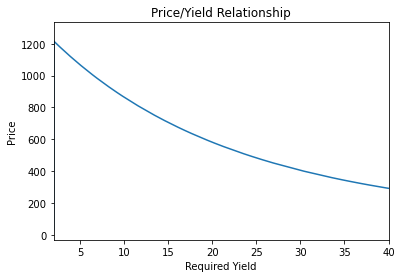

In [11]:
x = np.arange(.01, 100, .01)
y = price.bond_price_calc(bond_len=5, coupon_per=6, par_val=1000, req_yield_per=x, call_val=1030, len_time='semiannual', details=False)[2]

plt.xlim([2,40])
plt.plot(x, y)

# set labels
plt.xlabel('Required Yield')
plt.ylabel('Price')
plt.title('Price/Yield Relationship')

plt.show()

In [12]:
bond_yield_maturity_calc(bond_len=5, coupon_per=.06, bond_price=700.89, par_val=1000, call_val=1030, len_time='semiannual', details=True)

Yield-to-Maturity Lookup - 15.17%


15.17

### Yield for an Investment

##### Example
| **Bond** | **Coupon Rate** | **Maturity** | **Par Value** | **Price Value** | **Yield-to-Maturity** |
|----------|-----------------|--------------|---------------|-----------------|-----------------------|
|     A    |       7.0%      |    5 years   |  \$10,000,000 |    \$9,209,000  |          9.0%         |
|     B    |      10.5%      |    7 years   |  \$20,000,000 |   \$20,000,000  |         10.5%         |
|     C    |       6.0%      |    3 years   |  \$30,000,000 |   \$28,050,000  |          8.5%         |

In [13]:
df = pd.DataFrame()
df['Bond'] = ['A', 'B', 'C']
df['Coupon Rate'] = [7.0, 10.5, 6.0]
df['Maturity'] = [5, 7, 3]
df['Period'] = ['semiannual', 'semiannual', 'semiannual']
df['Par Value'] = [10000000, 20000000, 30000000]
df['Price Value'] = [9209000, 20000000, 28050000]
df['Yield-to-Maturity'] = [9.0, 10.5, 8.5]
display(df)

,Bond,Coupon Rate,Maturity,Period,Par Value,Price Value,Yield-to-Maturity
0,A,7.0,5,semiannual,10000000,9209000,9.0
1,B,10.5,7,semiannual,20000000,20000000,10.5
2,C,6.0,3,semiannual,30000000,28050000,8.5


In [27]:
bond_yield_maturity_calc(bond_len=7, coupon_per=7, bond_price=57259000, par_val=60000000, len_time='semiannual', details=True)

Yield-to-Maturity Lookup - 7.86%


7.86

In [31]:
bond_yield_maturity_calc(bond_len=3, coupon_per=6, bond_price=28050000, par_val=30000000, len_time='semiannual', details=True)

Yield-to-Maturity Lookup - 8.50%


8.5

In [ ]:
bond_yield_maturity_calc(bond_len=7, coupon_per=7, bond_price=57259000, par_val=60000000, len_time='semiannual', details=True)

In [ ]:
bond_yield_maturity_calc(bond_len=7, coupon_per=7, bond_price=57259000, par_val=60000000, len_time='semiannual', details=True)

In [26]:
a_coup, a_mat, a_len = price.bond_cash_flow_calc(5, 7, 10000000, len_time='semiannual', details=False)
a = a_coup * a_len + a_mat

b_coup, b_mat, b_len = price.bond_cash_flow_calc(7, 10.5, 20000000, len_time='semiannual', details=False)
b = b_coup * b_len + b_mat

c_coup, c_mat, c_len = price.bond_cash_flow_calc(3, 6, 30000000, len_time='semiannual', details=False)
c = c_coup * c_len + c_mat

(a + b + c)

83600000.0

In [73]:
(83600000-60000000)/60000000*(1/14)

0.028095238095238093

In [49]:
((60000000/57259000)-1)*2

0.09574040762150915

In [74]:
bond_yield_maturity_calc(bond_len=7, coupon_per=0.028095238095238093, bond_price=57259000, par_val=60000000, len_time='semiannual', details=True)

Yield-to-Maturity Lookup - 3.55%


3.55

COMPUTE PORTFOLIO CALC:
START WITH THE DATAFRAME ABOVE
EXTEND INTO NEW DATAFRAME
FOR EACH PERIOD, CALCULATE THE PRICE AT EVERY SINGLE PERIOD OF THE CASHFLOWS (SIMILAR TO PRICE CALC FOR SETT)
ADD THEM ALL UP TO FIND THE PRICE OF TOTAL PRICE VALUE OF THE PORTFOLIO
FOR MANY DIFFERENT REQUIRED YEILDS, FIND YIELD EQUAL TO THE 57,529,000
OR BY BREAKDOWN

In [ ]:
price.bond_price_calc(7, coupon_per, 60000000, req_yield_per, call_val=0, len_time='annual', details=True)